In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('./data/AustralianWines.csv', header=0)
data.head()

,Month,Fortified,Red,Rose,sparkling,Sweet white,Dry white
0,Jan-80,2585,464,112,1686,85,1954
1,Feb-80,3368,675,118,1591,89,2302
2,Mar-80,3210,703,129,2304,109,3054
3,Apr-80,3111,887,99,1712,95,2414
4,May-80,3756,1139,116,1471,91,2226


In [4]:
data.drop(['Red ', 'Rose ', 'sparkling ', 'Sweet white',
       'Dry white'],axis=1,inplace=True)

In [5]:
#Create a date range
dates = pd.date_range(start='1980-01-01', freq='MS', periods=len(data))
dates[0:5]

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [6]:
dates.month[0:5]

Int64Index([1, 2, 3, 4, 5], dtype='int64')

In [7]:
#Convert month number to calendar month abbr
import calendar
data['Month'] = dates.month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data['Year'] = dates.year

In [8]:
data.head(5)

,Month,Fortified,Year
0,Jan,2585,1980
1,Feb,3368,1980
2,Mar,3210,1980
3,Apr,3111,1980
4,May,3756,1980


In [9]:
data.rename(columns={'Fortified':'Fortified'}, inplace=True)

In [11]:
data = data[['Month', 'Year', 'Fortified']]

In [12]:
data.set_index(dates, inplace=True)
data.head()

,Month,Year,Fortified
1980-01-01,Jan,1980,2585
1980-02-01,Feb,1980,3368
1980-03-01,Mar,1980,3210
1980-04-01,Apr,1980,3111
1980-05-01,May,1980,3756


In [13]:
# extract out the time-series
wine = data['Fortified']

Text(0, 0.5, 'fortified')

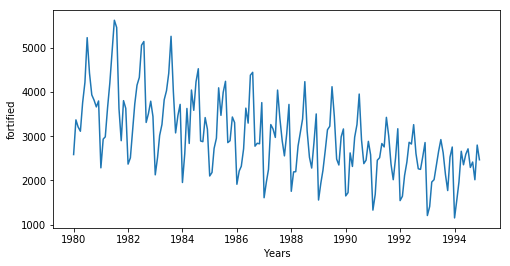

In [14]:
#Plot the time series
plt.figure(figsize=(8, 4))
plt.plot(wine)
plt.xlabel('Years')
plt.ylabel('fortified')

# Stationarity

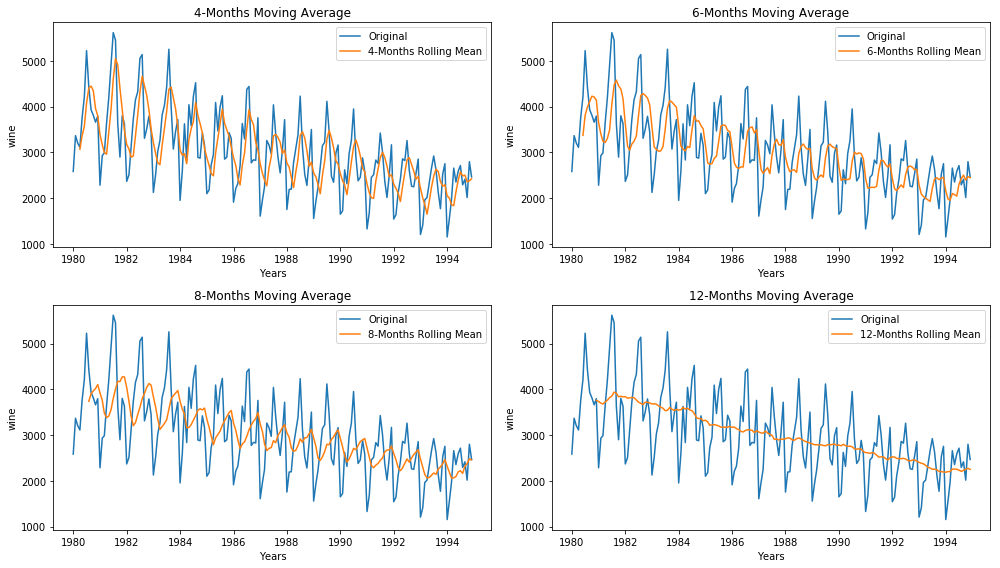

In [15]:
#Creating the subplot placeholders
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

#4 month MA
axes[0][0].plot(wine.index, wine, label='Original')
axes[0][0].plot(wine.index, wine.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("wine")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

#6 month MA
axes[0][1].plot(wine.index, wine, label='Original')
axes[0][1].plot(wine.index, wine.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("wine")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

#8 month MA
axes[1][0].plot(wine.index, wine, label='Original')
axes[1][0].plot(wine.index, wine.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("wine")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

#12 month MA
axes[1][1].plot(wine.index, wine, label='Original')
axes[1][1].plot(wine.index, wine.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("wine")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()


In [16]:
#Determing rolling statistics
rolmean = wine.rolling(window=12).mean()
rolstd = wine.rolling(window=12).std()
print(rolmean[1:20])
print(rolstd[1:20])

1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01            NaN
1980-08-01            NaN
1980-09-01            NaN
1980-10-01            NaN
1980-11-01            NaN
1980-12-01    3758.416667
1981-01-01    3733.416667
1981-02-01    3697.250000
1981-03-01    3678.500000
1981-04-01    3723.083333
1981-05-01    3759.916667
1981-06-01    3819.833333
1981-07-01    3852.583333
1981-08-01    3938.250000
Freq: MS, Name: Fortified, dtype: float64
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01            NaN
1980-08-01            NaN
1980-09-01            NaN
1980-10-01            NaN
1980-11-01            NaN
1980-12-01     680.871027
1981-01-01     731.498395
1981-02-01     761.328399
1981-03-01     777.028080
1981-04-01     756.586047
1981-05-01     768.991602
1981-06-01     833.097051
1981-07-01     898.513

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

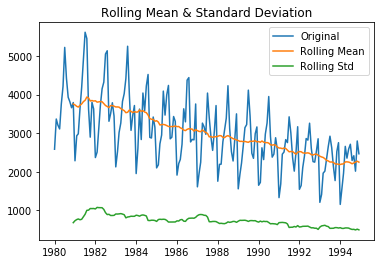

In [17]:
#Plot rolling statistics:
orig = plt.plot(wine, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

# Dickey Fuller Test

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
dftest = adfuller(wine)
dftest

(-0.505602347841613,
 0.8909185913689786,
 11,
 168,
 {'1%': -3.4698858990744115,
  '5%': -2.8789026251889647,
  '10%': -2.5760266680839004},
 2388.660785053755)

# Seasonality

In [21]:
monthly_data = pd.pivot_table(data, values = "Fortified", columns = "Year", index = "Month")
monthly_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994
Month,,,,,,,,,,,,,,,
Apr,3111,3646,3728,3265,2836,2954,2714,3262,2777,2676,2316,2514,2415,2018,2659
Aug,4426,5454,5138,5255,4523,4239,4442,3402,3118,3446,2917,3006,2606,2626,2294
Dec,3795,3629,3446,3718,3159,3307,3758,3717,3502,3163,2579,3168,2856,2755,2467
Feb,3368,2934,2511,2523,2604,2181,2214,1968,2193,1940,1725,1686,1643,1412,1568
Jan,2585,2285,2369,2127,1954,2101,1914,1610,1755,1558,1651,1330,1545,1208,1154
Jul,5225,5618,5054,4420,4225,3990,4377,4041,4231,4117,3951,3425,3260,2923,2714
Jun,4216,4935,4326,4027,3584,3470,3295,2972,3389,3224,3263,2757,2822,2660,2592
Mar,3210,2985,3079,3017,3626,2724,2320,2248,2198,2226,2622,2457,2112,1964,1965
May,3756,4198,4151,3822,4042,4092,3633,3164,3076,3145,2976,2834,2862,2329,2354


In [22]:
#Change the sequence to start from Jan
monthly_sales_data = monthly_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 
                                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994
Month,,,,,,,,,,,,,,,
Jan,2585,2285,2369,2127,1954,2101,1914,1610,1755,1558,1651,1330,1545,1208,1154
Feb,3368,2934,2511,2523,2604,2181,2214,1968,2193,1940,1725,1686,1643,1412,1568
Mar,3210,2985,3079,3017,3626,2724,2320,2248,2198,2226,2622,2457,2112,1964,1965
Apr,3111,3646,3728,3265,2836,2954,2714,3262,2777,2676,2316,2514,2415,2018,2659
May,3756,4198,4151,3822,4042,4092,3633,3164,3076,3145,2976,2834,2862,2329,2354
Jun,4216,4935,4326,4027,3584,3470,3295,2972,3389,3224,3263,2757,2822,2660,2592
Jul,5225,5618,5054,4420,4225,3990,4377,4041,4231,4117,3951,3425,3260,2923,2714
Aug,4426,5454,5138,5255,4523,4239,4442,3402,3118,3446,2917,3006,2606,2626,2294
Sep,3932,3624,3310,4009,2892,2855,2774,2898,2524,2482,2380,2369,2264,2132,2416


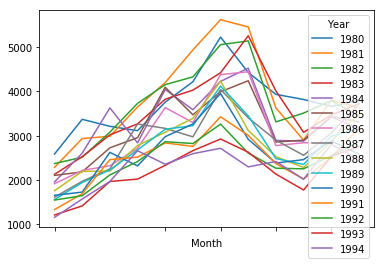

In [23]:
#Lineplot of monthwise sales across years
monthly_sales_data.plot()

In [24]:
#Create yearly sales data to look at yearly trend
yearly_sales_data = pd.pivot_table(data, values = "Fortified", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,2585,3368,3210,3111,3756,4216,5225,4426,3932,3816,3661,3795
1981,2285,2934,2985,3646,4198,4935,5618,5454,3624,2898,3802,3629
1982,2369,2511,3079,3728,4151,4326,5054,5138,3310,3508,3790,3446
1983,2127,2523,3017,3265,3822,4027,4420,5255,4009,3074,3465,3718
1984,1954,2604,3626,2836,4042,3584,4225,4523,2892,2876,3420,3159
1985,2101,2181,2724,2954,4092,3470,3990,4239,2855,2897,3433,3307
1986,1914,2214,2320,2714,3633,3295,4377,4442,2774,2840,2828,3758
1987,1610,1968,2248,3262,3164,2972,4041,3402,2898,2555,3056,3717
1988,1755,2193,2198,2777,3076,3389,4231,3118,2524,2280,2862,3502


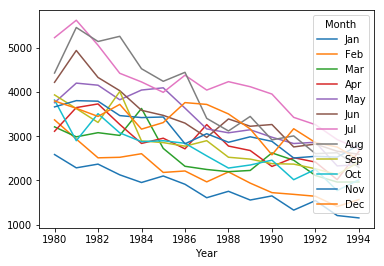

In [25]:
#Lineplot of yearly sales
yearly_sales_data.plot()

# Decomposition

In [26]:
#Multiplicative decomposition of the series
decomposition = sm.tsa.seasonal_decompose(wine, model='multiplicative')

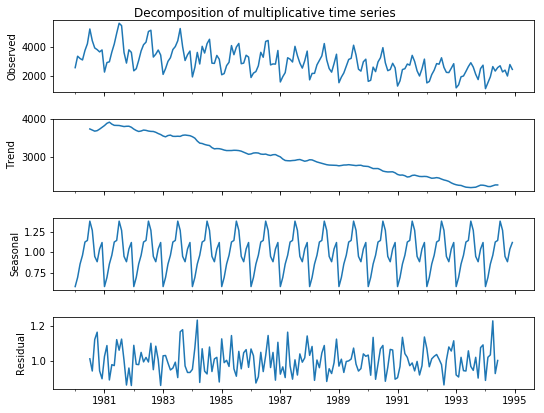

In [27]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

Text(0, 0.5, 'wine')

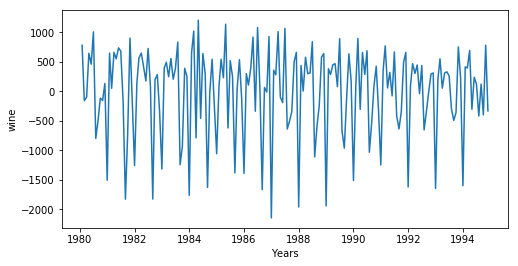

In [28]:
#Differencing once to remove trend
plt.figure(figsize=(8, 4))
plt.plot(wine.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('wine')

Text(0, 0.5, 'Log (wine)')

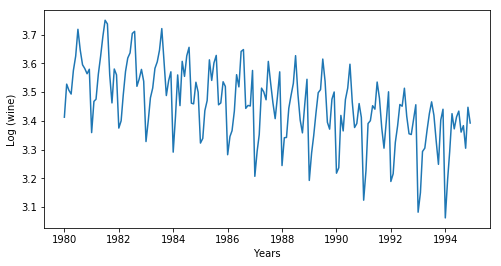

In [29]:
#Log of time series
plt.figure(figsize=(8, 4))
plt.plot(np.log10(wine))
plt.xlabel('Years')
plt.ylabel('Log (wine)')

Text(0, 0.5, 'Differenced Log (wine)')

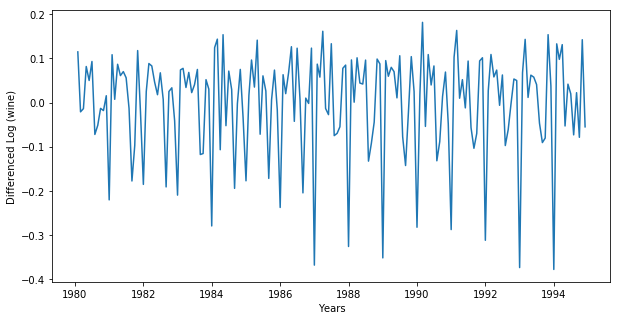

In [30]:
#Difference of log
plt.figure(figsize=(10, 5))
plt.plot(np.log10(wine).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (wine)')

In [31]:
#Log of the time series
wine_log = np.log10(wine)
wine_log.dropna(inplace=True)

#Diff of the log
wine_log_diff = wine_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
wine_log_diff.dropna(inplace=True)

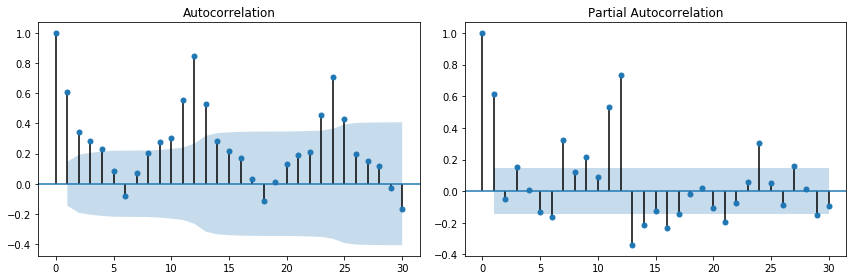

In [32]:
##ACF and PACF plots of the log series
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(wine_log, lags=30, ax=axes[0])
smt.graphics.plot_pacf(wine_log, lags=30, ax=axes[1])
plt.tight_layout()

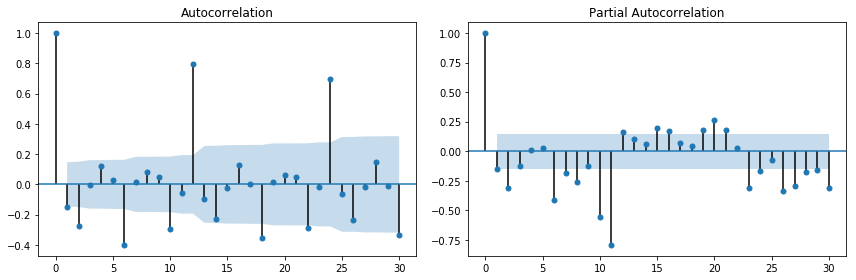

In [33]:
#ACF and PACF plots of diff of log series
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(wine_log_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(wine_log_diff, lags=30, ax=axes[1])
plt.tight_layout()

In [34]:
# Create a diff of 12 on the log series
#Diff of the log
wine_log_diff12 = wine_log.diff(periods=12) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
wine_log_diff12.dropna(inplace=True)

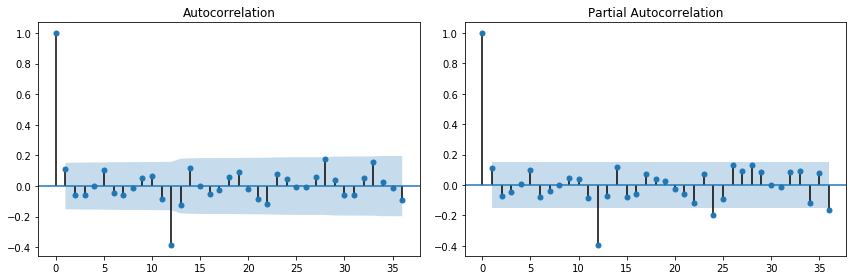

In [35]:
#ACF and PACF plots of diff of log series
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(wine_log_diff12, lags=36, ax=axes[0])
smt.graphics.plot_pacf(wine_log_diff12, lags=36, ax=axes[1])
plt.tight_layout()

In [36]:
dftest = adfuller(wine_log_diff)
dftest

(-28.555639881358992,
 0.0,
 10,
 168,
 {'1%': -3.4698858990744115,
  '5%': -2.8789026251889647,
  '10%': -2.5760266680839004},
 -528.6299738482362)

In [37]:
dftest12 = adfuller(wine_log_diff12)
dftest12

(-5.669647222599183,
 8.983469169935371e-07,
 12,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -523.9668680865482)

In [38]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

In [39]:
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [40]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [41]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [42]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [43]:
#Separate data into train and test
data['date'] = data.index
train = data[0:int(len(data)*0.7)]
test = data[int(len(data)*0.7):]
train_wine_log = np.log10(train['Fortified'])

In [44]:
train.head()

,Month,Year,Fortified,date
1980-01-01,Jan,1980,2585,1980-01-01
1980-02-01,Feb,1980,3368,1980-02-01
1980-03-01,Mar,1980,3210,1980-03-01
1980-04-01,Apr,1980,3111,1980-04-01
1980-05-01,May,1980,3756,1980-05-01


In [45]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [46]:
for param in pdq:
    for param_seasonal in seasonal_pdq:      
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_wine_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True)
            results = temp_model.fit()
            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 model - AIC:-399.19621313180096


# comparing our model with a random order model

In [47]:
param_order = (0, 1, 1)
param_seasonal_order = (0, 1, 1, 12)

In [49]:
model = sm.tsa.statespace.SARIMAX(wine_log, order=param_order, 
                                  seasonal_order=param_seasonal_order,enforce_stationarity=True)
results = model.fit()
print("SARIMAX{}x{}12 model - AIC:{}".format(param_order, param_seasonal_order, results.aic))

SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:-579.7833430002685


# Predict sales on in-sample date using the best fit ARIMA model

In [51]:
best_model = sm.tsa.statespace.SARIMAX(train_wine_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [52]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                          Fortified   No. Observations:                  125
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 203.598
Date:                            Wed, 01 May 2019   AIC                           -399.196
Time:                                    21:52:38   BIC                           -387.915
Sample:                                01-01-1980   HQIC                          -394.614
                                     - 05-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9614      0.029    -33.556      0.000      -1.018      -0.905
ar.S.L12       0.9871      0.011   

In [54]:
param_order = (0, 1, 1)
param_seasonal_order = (0, 1, 1, 12)
model = sm.tsa.statespace.SARIMAX(train_wine_log, order=param_order, 
                                  seasonal_order=param_seasonal_order,enforce_stationarity=True)
results = model.fit()
print("SARIMAX{}x{}12 model - AIC:{}".format(param_order, param_seasonal_order, results.aic))

SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:-379.46092536210654


In [55]:
pred99 = best_results.get_forecast(steps=24, alpha=0.1)

In [56]:
# Extract the predicted and true values of our time series
testCopy = test.copy()
testCopy['wine_forecasted'] = np.power(10, pred99.predicted_mean)

In [57]:
testCopy

,Month,Year,Fortified,date,wine_forecasted
1990-06-01,Jun,1990,3263,1990-06-01,3003.543376
1990-07-01,Jul,1990,3951,1990-07-01,3785.826930
1990-08-01,Aug,1990,2917,1990-08-01,3233.558319
1990-09-01,Sep,1990,2380,1990-09-01,2431.321514
1990-10-01,Oct,1990,2458,1990-10-01,2275.346197
1990-11-01,Nov,1990,2883,1990-11-01,2753.016739
1990-12-01,Dec,1990,2579,1990-12-01,3092.946208
1991-01-01,Jan,1991,1330,1991-01-01,1566.014778
1991-02-01,Feb,1991,1686,1991-02-01,1788.692978
1991-03-01,Mar,1991,2457,1991-03-01,2243.668522


In [58]:
# Compute the root mean square error
mse = ((testCopy['Fortified'] - testCopy['wine_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 186.949


In [59]:
# Compute the MAPE 
abs_error = np.abs(testCopy['Fortified'] - testCopy['wine_forecasted'])
actual = testCopy['Fortified']
mape = np.round(np.mean(abs_error/actual),3)
mape

0.062

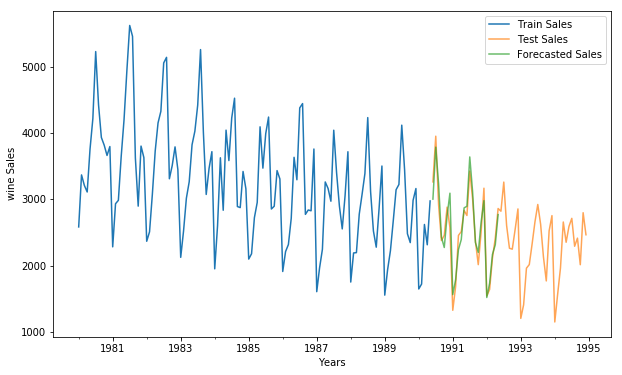

In [60]:
axis = train['Fortified'].plot(label='Train Sales', figsize=(10, 6))
testCopy['Fortified'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['wine_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

# We can see that arima predicts the wine sales the best. it has meast mape of all models. hence arima is the best model

# Forecast sales using the best fit ARIMA model

In [61]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

In [62]:
# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [63]:
n_steps = 36
idx = pd.date_range(data.index[-1], periods=n_steps, freq='MS')

In [64]:
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])

In [65]:
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [66]:
fc_all = fc_95.combine_first(fc_99)

In [67]:
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # reordering columns

In [68]:
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1994-12-01,3003.543376,2489.943806,3623.082893,2489.943806,3623.082893
1995-01-01,3785.826930,3138.020951,4567.364517,3138.020951,4567.364517
1995-02-01,3233.558319,2679.879524,3901.630394,2679.879524,3901.630394
1995-03-01,2431.321514,2014.728361,2934.055239,2014.728361,2934.055239
1995-04-01,2275.346197,1885.216234,2746.210341,1885.216234,2746.210341


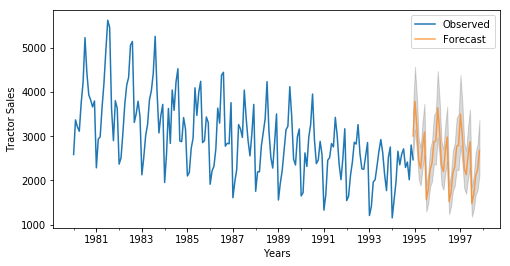

In [70]:
# plot the forecast along with the confidence band
axis = wine.plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

# Plot ACF and PACF for residuals of ARIMA model to ensure no more information is left for extraction

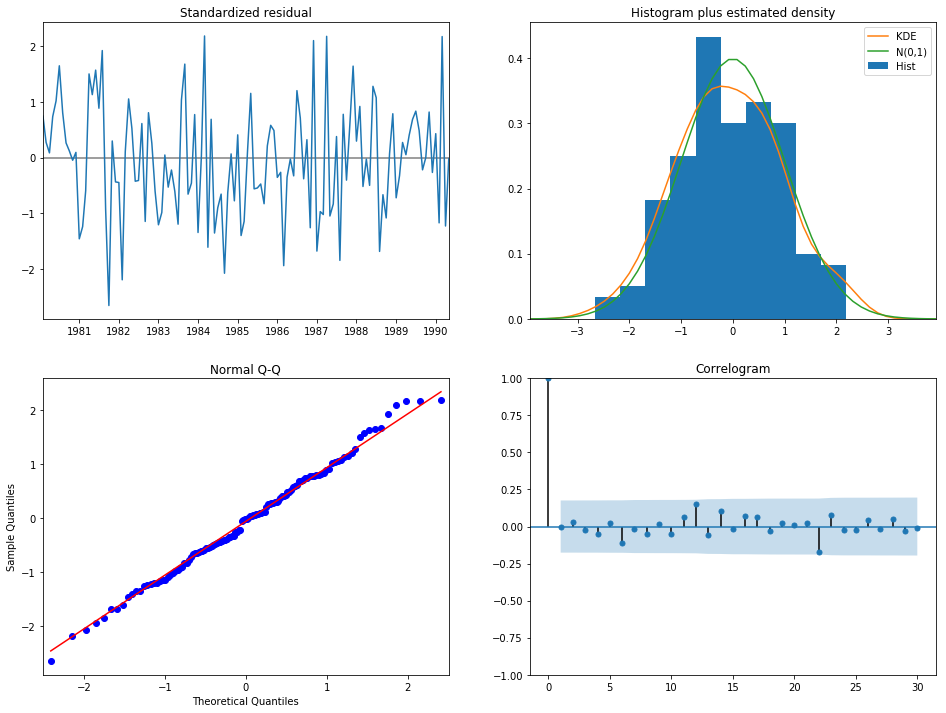

In [71]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()